# Assessment Tasks for Applied Statistics
___

## Task 1 - Permutations and Combinations


___

### Lady tasting tea experiment
The task is to firstly calculate the probability of choosing correctly when the [lady tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment is expanded to 12 cups total (6 milk first).

The lady tasting tea experiment is a classic experiment in statistics first devised by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his book *The Design of Experiments*. In the experiment a subject is presented with 8 cups of tea, 4 of which had the milk added first and 4 of which had the tea added first. The two groups are randomly distributed. The subject is then tasked with separating the cups by order of liquid added.

The probability of the subject seperating the groups correctly by random chance is gotten by finding the number of combinations of ways there are to choose 4 cups from the 8. The formula to calculate this is given as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

Where n = 8 and k = 4. Thus for the experiment the calculation is 

$\binom{8}{4} = \frac{8!}{4!(8-4)!}$

This gives a total of 70 possible combinations, and so the chances of correctly separating the two groups by random chance are 1 in 70.

Calculating the probability of choosing correctly when there are 12 cups instead of 8 can be done in the same manner. In this instance n = 12 and k = 6, giving the formula

$\binom{12}{6} = \frac{12!}{6!(12-6)!}$

Python has a method for carrying out this calculation built into the math module called `math.comb`


In [71]:
# Import all libraries used in the notebook

# https://docs.python.org/3/library/math.html#module-math
import math

# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# https://docs.python.org/3/library/random.html#module-random
import random

# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions-scipy-stats
import scipy.stats as stats

# https://pandas.pydata.org/pandas-docs/stable/index.html
import pandas as pd

In [72]:
# Set variables representing n and k
total_cups = 12
milk_cups = 6

# Calculate the number of combinations
cups_combinations = math.comb(total_cups, milk_cups)

print(f'There are {cups_combinations} combinations.')

There are 924 combinations.


The above calculation show that there are 924 possible combinations of 6 cups that can be chosen from the total of 12. This would imply that if the lady (or other participant) is choosing at random they have a 1 in 924 chance of choosing the correct set of cups.

### Single error allowed

If the taster is allowed to make a single error then they are only required to choose 5 correct cups.

In [73]:
# Generate numbered labels for the cups
labels = list(range(total_cups))

In [74]:
# Generate a list with all possible combinations of 5 cups chosen from 12
comb_list = list(itertools.combinations(labels, milk_cups))

comb_list

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [75]:
# Show the length of the list
len(comb_list)

924

In [76]:
# Select 6 of the cups to have milk added first
milk_labels = random.sample(labels, 6)

milk_labels.sort()

milk_labels

[0, 1, 2, 3, 7, 9]

In [77]:
# Turn into a set
set(milk_labels)

{0, 1, 2, 3, 7, 9}

In [78]:
# Check the overlap between each element of the comb_list and the milk_labels set

overlaps = []

for comb in comb_list:
    s1 = set(comb)
    s2 = set(milk_labels)
    overlap = s1.intersection(s2)
    print(comb, overlap, len(overlap))
    overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 2, 3} 4
(0, 1, 2, 3, 4, 6) {0, 1, 2, 3} 4
(0, 1, 2, 3, 4, 7) {0, 1, 2, 3, 7} 5
(0, 1, 2, 3, 4, 8) {0, 1, 2, 3} 4
(0, 1, 2, 3, 4, 9) {0, 1, 2, 3, 9} 5
(0, 1, 2, 3, 4, 10) {0, 1, 2, 3} 4
(0, 1, 2, 3, 4, 11) {0, 1, 2, 3} 4
(0, 1, 2, 3, 5, 6) {0, 1, 2, 3} 4
(0, 1, 2, 3, 5, 7) {0, 1, 2, 3, 7} 5
(0, 1, 2, 3, 5, 8) {0, 1, 2, 3} 4
(0, 1, 2, 3, 5, 9) {0, 1, 2, 3, 9} 5
(0, 1, 2, 3, 5, 10) {0, 1, 2, 3} 4
(0, 1, 2, 3, 5, 11) {0, 1, 2, 3} 4
(0, 1, 2, 3, 6, 7) {0, 1, 2, 3, 7} 5
(0, 1, 2, 3, 6, 8) {0, 1, 2, 3} 4
(0, 1, 2, 3, 6, 9) {0, 1, 2, 3, 9} 5
(0, 1, 2, 3, 6, 10) {0, 1, 2, 3} 4
(0, 1, 2, 3, 6, 11) {0, 1, 2, 3} 4
(0, 1, 2, 3, 7, 8) {0, 1, 2, 3, 7} 5
(0, 1, 2, 3, 7, 9) {0, 1, 2, 3, 7, 9} 6
(0, 1, 2, 3, 7, 10) {0, 1, 2, 3, 7} 5
(0, 1, 2, 3, 7, 11) {0, 1, 2, 3, 7} 5
(0, 1, 2, 3, 8, 9) {0, 1, 2, 3, 9} 5
(0, 1, 2, 3, 8, 10) {0, 1, 2, 3} 4
(0, 1, 2, 3, 8, 11) {0, 1, 2, 3} 4
(0, 1, 2, 3, 9, 10) {0, 1, 2, 3, 9} 5
(0, 1, 2, 3, 9, 11) {0, 1, 2, 3, 9} 5
(0, 1, 2, 3, 10, 11) {0, 1, 

In [79]:
print(overlaps)

[4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 6, 5, 5, 5, 4, 4, 5, 5, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 5, 4, 4, 5, 5, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 5, 4, 4, 5, 5, 4, 4, 4, 3, 4, 3, 2, 3, 2, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 5, 4, 4, 5, 5, 4, 4, 4, 3, 4, 3, 2, 3, 2, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 4, 4, 

In [80]:
# Count the number of times each overlap occurs
counts = np.unique(overlaps, return_counts=True)

counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

<BarContainer object of 7 artists>

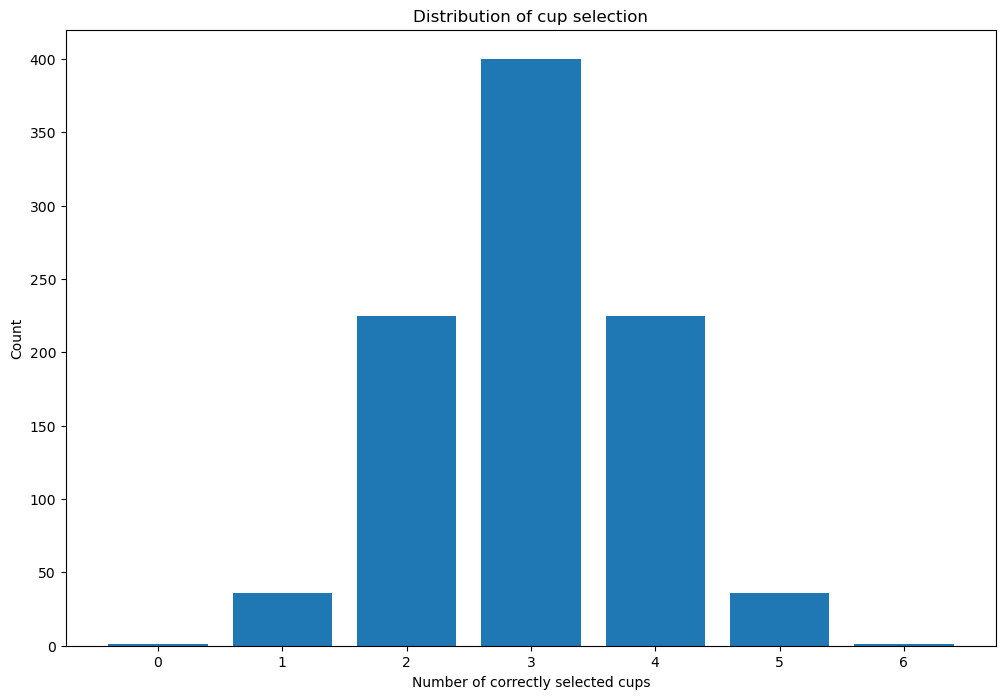

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlabel('Number of correctly selected cups')
plt.ylabel('Count')
plt.title('Distribution of cup selection')
ax.bar(counts[0], counts[1])

In [82]:
# 37 is taken as that is the number of times either 5 or 6 overlaps occur
37/924

0.04004329004329004

Allowing one error on the Lady Tasting Tea Experiment when conducted with 12 cups gives a roughly 0.04 chance of randomly picking 5 correct cups.

### Two errors allowed

If the taster is allowed to make two errors then they are only required to choose 4 correct cups from the total of 12.

From the above graph we can see that this increases the number of overlaps to 225 + 36 + 1 = 262

In [83]:
# Calculate the probability of 4 or more overlaps
262/924

0.28354978354978355

There is approximately a 0.284 probability of correctly selecting 4 or more cups by random chance.

Given how far above the standard threshold of [p < 0.05](https://www.statology.org/p-value-less-than-0-05/) this value is it does not seem reasonable to reject the null hypothesis on this basis.

## Task 2 - numpy's Normal Distribution

___

The purpose of this task is to assess whether `numpy.random.normal()` properly generates normal values. This is to be done by generating one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

The documentation for numpy.random.normal can be found here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

The documentation for a scipy.stats.shapiro can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

In [84]:
# Generate data with an expected normal distribution
normal_data = np.random.normal(10, 3, 100000)

normal_data

array([ 5.84503298,  9.36900895,  7.83348932, ...,  0.87858749,
        7.60480874, 11.65785159])

In [85]:
# Test for normality using the Shapiro-Wilk test
stat, p_val = stats.shapiro(normal_data)
print(f'The test statistic is {stat} and the p-value is {p_val}')
if p_val > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

The test statistic is 0.9999756217002869 and the p-value is 0.7963782548904419
The data is normally distributed


c:\Users\thomas.brophy\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Shapiro-Wilk Test

The above code is the [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) test for normality. It tests the null-hypothesis that a sample came from a normally distributed population.

Given that the null hypothesis in the Shapiro-Wilk test is that the data is normally distributed, a high p-value leads us to believe that there is a high likelihood that the data is normally distributed and not to reject the null hypothesis. If running the above code resulted in a very low p-value (e.g. under 0.05) we would be more likely to reject the null hypothesis and infer that the data is not normally distributed.



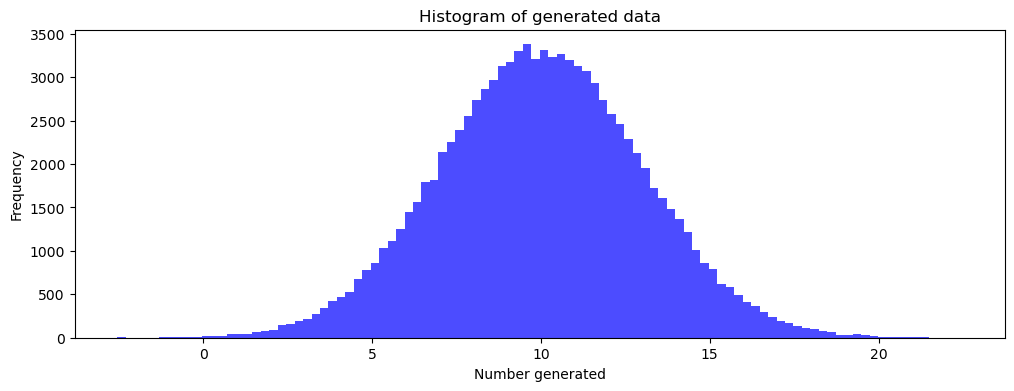

In [86]:
# Histogram of normal_data
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(normal_data, bins=100, color='blue', alpha=0.7)
plt.xlabel('Number generated')
plt.ylabel('Frequency')
plt.title('Histogram of generated data')
plt.show()


### Normal Distribution

The formula for the normal distribution probability density function is:
\begin{equation}
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
\end{equation}

In [87]:
# Create a function for the normal probability density function
def norm_pdf(x, mu=0.0, sigma=1.0):
    return (1 / np.sqrt(sigma**2 * 2 * np.pi)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

#Test PDF function
norm_pdf(0.0)

0.3989422804014327

In [88]:
# Create range of x values
x = np.linspace(0, 20, 10001)

# Calculate the PDF values
y = norm_pdf(x, 10, 3)

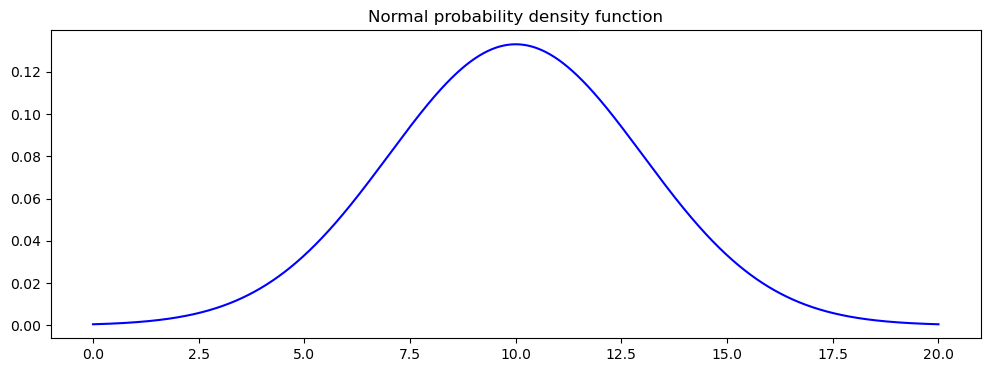

In [89]:
# Plot the PDF
fig, ax = plt.subplots(figsize=(12, 4))

plt.title('Normal probability density function')
ax.plot(x, y, color='blue')

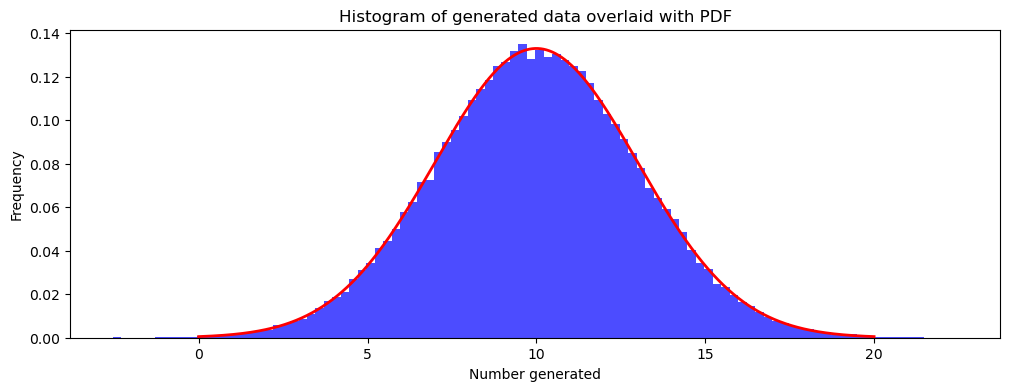

In [90]:
# Plot the PDF and histogram together
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(normal_data, bins=100, color='blue', alpha=0.7, density=True)
ax.plot(x, y, color='red', linewidth=2)
plt.xlabel('Number generated')
plt.ylabel('Frequency')
plt.title('Histogram of generated data overlaid with PDF')
plt.show()

Given the very close alignment between the generated data and the curve of the normal distribution probability density function it seems likely that `numpy.random.normal()` properly generates normal data.

## Task 3 - t-Test Calculation
___
For this task we are to calculate the t-statistic using Python and then compare it to the value given by `scipy.stats`.

The formula for the paired samples t-test is:
\begin{equation}
t = \frac{\bar{X}_1 - \bar{X}_2}{s_p\sqrt{\frac{2}{n}}}
\end{equation}

Where $\bar{X}_1 - \bar{X}_2$ represents the difference in the means of the two groups, $s_p$ represents the pooled standard deviation, and $n$ is the number of samples in each group.

The steps necessary to calculate the t-statistic from the above formula:

1. Calculate the difference between the paired observations.
2. Calculate the mean of the differences.
3. Calculate the standard deviation of the differences.
4. Determine the number of pairs.
5. Determine the standard error of the mean difference
6. Calculate the t-statistic.

In [91]:
# Import data from csv
data = pd.read_csv('data/task3.csv')
data

,patient_id,hr,category
0,0,63,before
1,1,68,before
2,2,70,before
3,3,64,before
4,4,74,before
5,5,67,before
6,6,70,before
7,7,57,before
8,8,66,before
9,9,65,before


In [92]:
# Split data by category
before = data.loc[data['category'] == 'before']
after = data.loc[data['category'] == 'after']
after

,patient_id,hr,category
10,0,64,after
11,1,64,after
12,2,68,after
13,3,64,after
14,4,73,after
15,5,70,after
16,6,72,after
17,7,54,after
18,8,61,after
19,9,63,after


In [93]:
# Calculate the differences between the 'before' and 'after' data
differences = after['hr'].values - before['hr'].values
differences

array([ 1, -4, -2,  0, -1,  3,  2, -3, -5, -2], dtype=int64)

In [94]:
# Calculate mean and standard deviation of the differences
mean = np.mean(differences)
std = np.std(differences)
mean, std

(-1.1, 2.467792535850613)

In [95]:
# Determine number of pairs
n = len(differences)
n

10

In [96]:
# Calculate the standard error of the mean difference
sem = std / np.sqrt(n)
sem

0.7803845206050667

In [97]:
# Calculate the t-statistic
t_stat = mean / sem
t_stat

-1.4095615314705645

In [98]:
# Calculate the t-statistic using scipy.stats
t_stat, p_val = stats.ttest_rel(after['hr'], before['hr'])
t_stat, p_val

(-1.337227482480628, 0.21396011317404623)

The above shows that the t-statistic I have calculated using Python (and some numpy) is slightly different to the t-statistic calculated by `scipy.stats`.

This stackoverflow page gives some insight into a possible reason why the two are different: https://stackoverflow.com/questions/28405442/calculating-t-statistics-using-scipy-stats

In [99]:
# Calculate agin with amended ddof
# https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy-std
std = np.std(differences, ddof=1)
sem = std / np.sqrt(n)
t_stat = mean / sem
t_stat

-1.3372274824806283

Above we can see that adjusting the degrees of freedom as suggested by the user on stack overflow has resulted in a t-statistic that matches `scipy.stats`.

## Task 4 - ANOVA
___

In this task, the probability of committing a Type II error in specific circumstances will be estimated.

A [Type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors), also referred to as a false negative, is a failure to reject the null hypothesis when the null hypothesis is actually false.

An [ANOVA (analysis of variance)](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) will be used to test three sets of randomly generated data to see if they have significantly different means. The one-way ANOVA, as will be used in this task, operates under 6 assumptions:
1. The dependent variable should be continuous, i.e. a floating point number.
2. The independent variable should consist of two or more categorical, independent groups.
3. Observations should be independent. This means there should be no relationship between observationsin each group or between groups themselves.
4. There should be no significant outliers.
5. The dependent variable should be approximately normally distributed for each category.
6. There should be homogeneity of variances.

The ANOVA operates with the null hypothesis that all groups compared have the same mean. When [`scipy.stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) is used it gives as output both the f-statistic and the p-value. Given that the null hypothesis is that the groups are all the same, if the p-value is below 0.05 we can reject the null hypothesis and infer that at least two of the groups have significantly different population means.

In [100]:
# Initialise the variable
no_type_ii = 0

# Generate data
for i in range(10000):
    a = np.random.normal(4.9, 0.1, 100)
    b = np.random.normal(5.0, 0.1, 100)
    c = np.random.normal(5.1, 0.1, 100)
    f_stat, p_val = stats.f_oneway(a, b, c)
    if p_val > 0.05:
        no_type_ii += 1

# Print out the results
print(f'The proportion of Type II errors was {no_type_ii / 10000}')
print(f'The total number of Type II errors was {no_type_ii}')

The proportion of Type II errors was 0.0
The total number of Type II errors was 0


In the above example, three groups of one hundred numbers are generated. Each of the three groups generated has a different mean. The three groups are then analysed using ANOVA. As the null hypothesis is not true in this example, a Type II error would be committed any time ANOVA produces a p-value > 0.05 (as this would lead to us not rejecting the null hypothesis).

As can be seen above, a Type II error is not committed in any of the 10,000 iterations. This would make it appear that the ANOVA has a very low probability of giving a Type II error under these circumstances.

### End
___